# Importation des bibliothéques

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import spacy 
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import (precision_recall_fscore_support , classification_report, accuracy_score,f1_score,precision_score,recall_score,roc_auc_score)
from time import time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


import utils as ut

# Etape 0 : Chargement de données movies

Dans cette partie nous allons rechargé les données de movies afin d'effectuer l'analyse de sentiments

In [2]:
path = "../datasets/movies/movies1000/"
alltxts,alllabs = ut.load_movies(path)

Création du DataFrame

In [3]:
movies_df = pd.DataFrame()
movies_df['text'] = alltxts
movies_df['label'] = alllabs

movies_df

,text,label
0,the kids in the hall are an acquired taste . \...,0
1,capsule : a science fiction allegory . \nat th...,0
2,there is a rule when it comes to movies . \na ...,0
3,it's amazing how a comedian can have the some ...,0
4,"absolute power , the new film produced and dir...",0
...,...,...
1995,"as i walked out of crouching tiger , hidden dr...",1
1996,"when andy leaves for cowboy camp , his mother ...",1
1997,plot : a bunch of bad guys dressed up as elvis...,1
1998,trees lounge is the directoral debut from one ...,1


# Comparaisons du temps d'apprentissage sur les différents modèles

In [4]:
def fonction_eval(vectorizer,state,alltexts,alllabs):

    [X_all_train, X_all_test, Y_train, y_test]  = train_test_split(alltexts, alllabs, test_size=0.2, random_state=state, shuffle=True)
    X_train = vectorizer.fit_transform(X_all_train)
    X_test = vectorizer.transform(X_all_test)

    tps1 = time()
    #Naïve Bayes
    nb_clf = MultinomialNB()
    nb_clf.fit(X_train, Y_train)
    pred_nbt = nb_clf.predict(X_train)
    pred_nb = nb_clf.predict(X_test)
    tps2 = time()
    temps_nb = tps2 - tps1

    tps1 = time()
    #Logistic Regression
    t = 1e-8
    C=100.0
    lr_clf = LogisticRegression(random_state=0, solver='liblinear',max_iter=100, tol=t, C=C)
    lr_clf.fit(X_train, Y_train)
    pred_lrt = lr_clf.predict(X_train)
    pred_lr = lr_clf.predict(X_test)
    tps2 = time()
    temps_lr = tps2 - tps1

    tps1 = time()
    #Linear SVM
    svm_clf = LinearSVC(random_state=0)
    svm_clf.fit(X_train, Y_train)
    pred_svmt = svm_clf.predict(X_train)
    pred_svm = svm_clf.predict(X_test)
    tps2 = time()
    temps_svm = tps2 - tps1

    print("--------------------------------Resultats-----------------------------------")

    print("\n------------------------------Logistic Regression----------------------------")
    print(classification_report(y_test, pred_lr))
    print(f"Accuracy : \t train= {accuracy_score(Y_train, pred_lrt)}, \t test= {accuracy_score(y_test, pred_lr)}")
    print(f"F1 score : \t train= {f1_score(Y_train, pred_lrt)}, \t test= {f1_score(y_test, pred_lr)}")
    print(f"Précision : \t train= {precision_score(Y_train, pred_lrt)}, \t test= {precision_score(y_test, pred_lr)}")
    print(f"Recall : \t train= {recall_score(Y_train, pred_lrt)}, \t test= {recall_score(y_test, pred_lr)}")
    print(f"ROC AUC : \t train= {roc_auc_score(Y_train, pred_lrt)}, \t test= {roc_auc_score(y_test, pred_lr)}")
    print("Temps d'éxécution : ",temps_lr)

    print("\n--------------------------------Naïve Bayes---------------------------------")
    print(classification_report(y_test, pred_nb))
    print(f"Accuracy : \t train= {accuracy_score(Y_train, pred_nbt)}, \t test= {accuracy_score(y_test, pred_nb)}")
    print(f"F1 score : \t train= {f1_score(Y_train, pred_nbt)}, \t test= {f1_score(y_test, pred_nb)}")
    print(f"Précision : \t train= {precision_score(Y_train, pred_nbt)}, \t test= {precision_score(y_test, pred_nb)}")
    print(f"Recall : \t train= {recall_score(Y_train, pred_nbt)}, \t test= {recall_score(y_test, pred_nb)}")
    print(f"ROC AUC :  \t train= {roc_auc_score(Y_train, pred_nbt)}, \t test= {roc_auc_score(y_test, pred_nb)}")
    print("Temps d'éxécution : ",temps_nb)


    print("\n----------------------------------SVM----------------------------------------")
    print(classification_report(y_test, pred_svm))
    print(f"Accuracy : \t train= {accuracy_score(Y_train, pred_svmt)}, \t test= {accuracy_score(y_test, pred_svm)}")
    print(f"F1 score : \t train= {f1_score(Y_train, pred_svmt)}, \t test= {f1_score(y_test, pred_svm)}")
    print(f"Précision : \t train= {precision_score(Y_train, pred_svmt)}, \t test= {precision_score(y_test, pred_svm)}")
    print(f"Recall : \t train= {recall_score(Y_train, pred_svmt)}, \t test= {recall_score(y_test, pred_svm)}")
    print(f"ROC AUC : \t train= {roc_auc_score(Y_train, pred_svmt)}, \t test= {roc_auc_score(y_test, pred_svm)}")
    print("Temps d'éxécution : ",temps_svm)

In [5]:
f = lambda doc: ut.suppression_balises_html( ut.remove_numbers(ut.remove_ponctuation(doc)) ) 

In [14]:
size_features = [10, 100, 1000, 10_000, 20_000, 40_000, 50_000, 80_000, 100_000]
min_df=5             
max_df=10000
temps_lr= []
temps_nb= []
temps_svm= []

acc_lr=[]
acc_nb=[]
acc_svm=[]

f1_score_nb =[]
f1_score_lr =[]
f1_score_svm =[]


roc_auc_score_nb = []
roc_auc_score_lr = []
roc_auc_score_svm = []
for nb_features in size_features:
    tf_idf_vectorizer = TfidfVectorizer(preprocessor=f, ngram_range=(1, 3), stop_words='english',tokenizer=word_tokenize, lowercase=True, max_features=nb_features)

    [X_all_train, X_all_test, Y_train, y_test]  = train_test_split(alltxts, alllabs, test_size=0.2, random_state=10, shuffle=True)
    X_train = tf_idf_vectorizer.fit_transform(X_all_train)
    X_test = tf_idf_vectorizer.transform(X_all_test)


    tps1 = time()
    #Naïve Bayes
    nb_clf = MultinomialNB()
    nb_clf.fit(X_train, Y_train)
    pred_nb = nb_clf.predict(X_test)
    tps2 = time()
    temps_nb_ = tps2 - tps1
    temps_nb.append(temps_nb_)
    acc_nb.append(accuracy_score(y_test, pred_nb))
    roc_auc_score_nb.append(roc_auc_score(y_test, pred_nb))
    f1_score_nb.append(f1_score(y_test, pred_nb))
    
    tps1 = time()
    #Logistic Regression
    t = 1e-8
    C=100.0
    lr_clf = LogisticRegression(random_state=0, solver='liblinear',max_iter=100, tol=t, C=C)
    lr_clf.fit(X_train, Y_train)
    pred_lr = lr_clf.predict(X_test)  
    tps2 = time()
    temps_lr_ = tps2 - tps1
    temps_lr.append(temps_lr_)
    acc_lr.append(accuracy_score(y_test, pred_lr))
    roc_auc_score_lr.append(roc_auc_score(y_test, pred_lr))
    f1_score_lr.append(f1_score(y_test, pred_lr))

    tps1 = time()
    #Linear SVM
    svm_clf = LinearSVC(random_state=0)
    svm_clf.fit(X_train, Y_train)
    pred_svm = svm_clf.predict(X_test)
    tps2 = time()
    temps_svm_ = tps2 - tps1
    temps_svm.append(temps_svm_)
    acc_svm.append(accuracy_score(y_test, pred_svm))
    roc_auc_score_svm.append(roc_auc_score(y_test, pred_svm))
    f1_score_svm.append(f1_score(y_test, pred_svm))


/home/anyes/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/anyes/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/anyes/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/anyes/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/anyes/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/anyes/.local/lib/py

## Comparaisons des scores : 

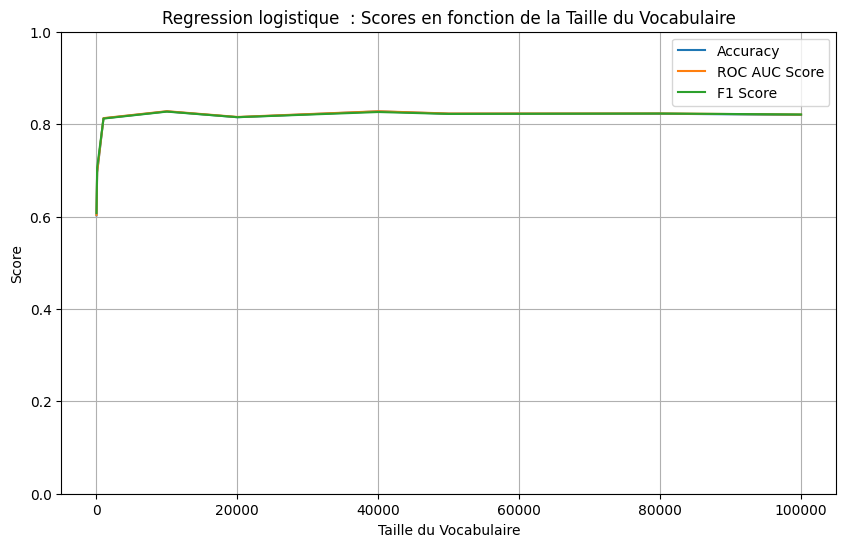

In [19]:
# Tracer les courbes
plt.figure(figsize=(10, 6))

plt.plot(size_features, acc_lr, label='Accuracy')
# plt.plot(size_features, f1_score_lr, label='F1 Score')
plt.plot(size_features, roc_auc_score_lr, label='ROC AUC Score')
plt.plot(size_features, f1_score_lr, label='F1 Score')

plt.xlabel('Taille du Vocabulaire')
plt.ylabel('Score')
plt.title('Regression logistique  : Scores en fonction de la Taille du Vocabulaire')
plt.ylim([0., 1.])
plt.legend()
plt.grid(True)
plt.show()

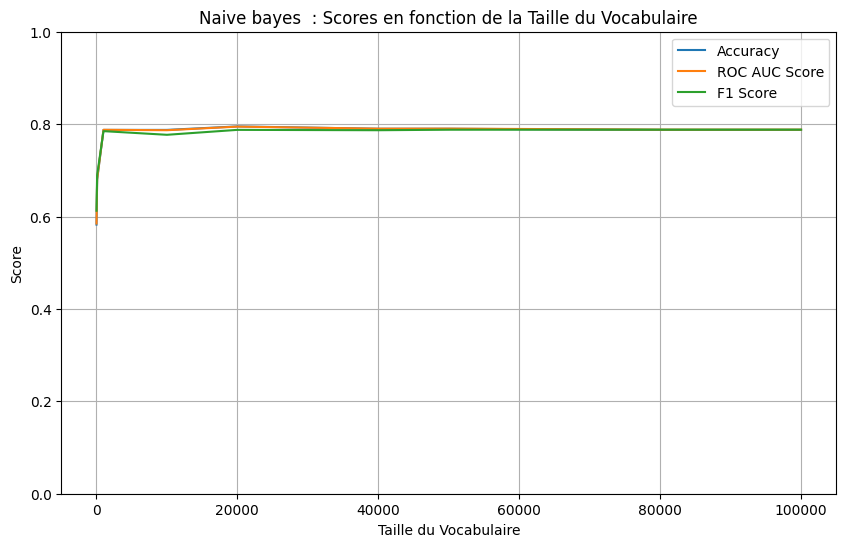

In [22]:
# Tracer les courbes
plt.figure(figsize=(10, 6))

plt.plot(size_features, acc_nb, label='Accuracy')
# plt.plot(size_features, f1_score_nb, label='F1 Score')
plt.plot(size_features, roc_auc_score_nb, label='ROC AUC Score')
plt.plot(size_features, f1_score_nb, label='F1 Score')


plt.xlabel('Taille du Vocabulaire')
plt.ylabel('Score')
plt.title('Naive bayes  : Scores en fonction de la Taille du Vocabulaire')
plt.ylim([0., 1.])
plt.legend()
plt.grid(True)
plt.show()

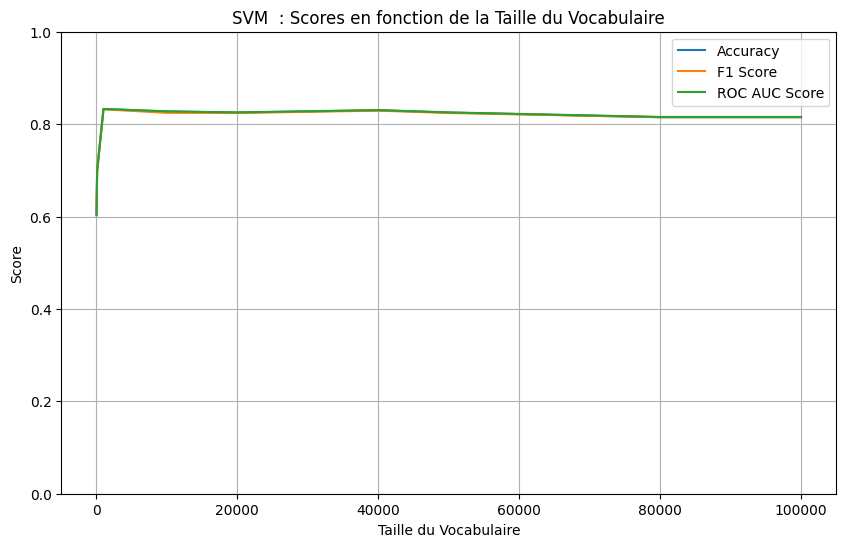

In [26]:
# Tracer les courbes
plt.figure(figsize=(10, 6))

plt.plot(size_features, acc_svm, label='Accuracy')
plt.plot(size_features, f1_score_svm, label='F1 Score')
plt.plot(size_features, roc_auc_score_svm, label='ROC AUC Score')

plt.xlabel('Taille du Vocabulaire')
plt.ylabel('Score')
plt.title('SVM  : Scores en fonction de la Taille du Vocabulaire')
plt.ylim([0., 1.])
plt.legend()
plt.grid(True)
plt.show()

## Comparaisons des temps d'execution : 

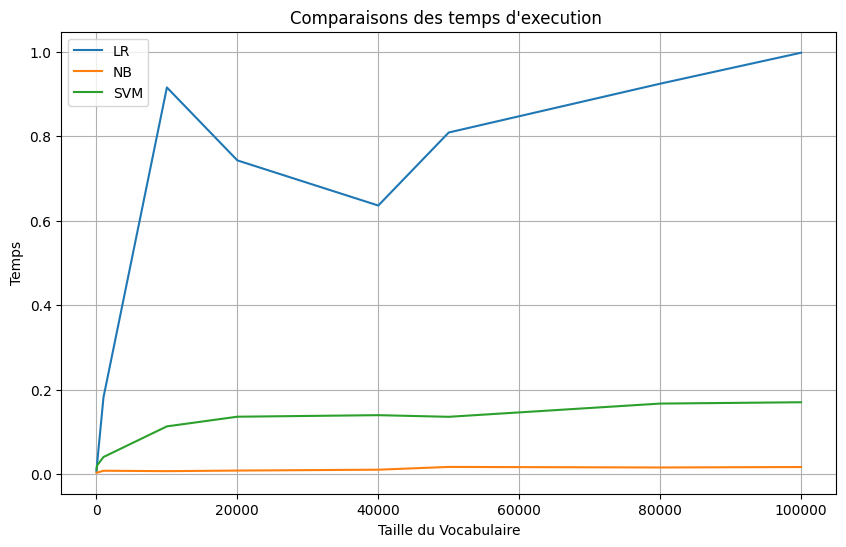

In [27]:
# Tracer les courbes
plt.figure(figsize=(10, 6))

plt.plot(size_features, temps_lr, label='LR')
plt.plot(size_features, temps_nb, label='NB')
plt.plot(size_features, temps_svm, label='SVM')

plt.xlabel('Taille du Vocabulaire')
plt.ylabel('Temps')
plt.title('Comparaisons des temps d\'execution ')
plt.legend()
plt.grid(True)
plt.show()

## Comparaison des performances : 

-   F1 score globale : 

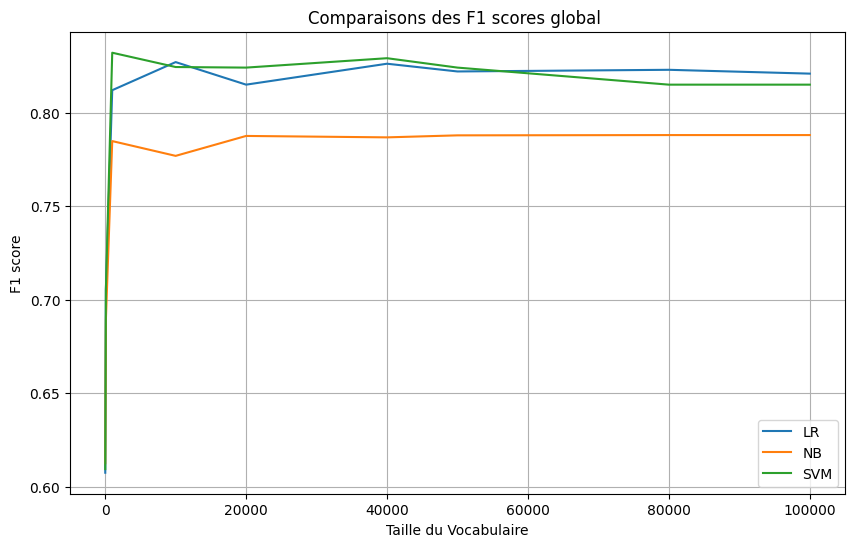

In [28]:
# Tracer les courbes
plt.figure(figsize=(10, 6))

plt.plot(size_features, f1_score_lr, label='LR')
plt.plot(size_features, f1_score_nb, label='NB')
plt.plot(size_features, f1_score_svm, label='SVM')

plt.xlabel('Taille du Vocabulaire')
plt.ylabel('F1 score')
plt.title('Comparaisons des F1 scores global ')
plt.legend()
plt.grid(True)
plt.show()